<a href="https://colab.research.google.com/github/Waranit-tec/Predict-Project/blob/main/bike_share205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **Boombikes Bike Sharing Prediction**

 โค้ดในการทำนาย จำนวนผู้เช่าจักรยาน  ด้วยเทคนิค Linear Regression โดยใช้ไลบรารี่ [kaggle](https://www.kaggle.com/datasets) บนชุดข้อมูล [Bike Sharing Dataset](https://www.kaggle.com/datasets/yasserh/bike-sharing-dataset)

## สมาชิกกลุ่ม
1. 6524650014 ณัฐธิดา แนวสุภาพ
2. 6524651095 ปาณิสรา กุยยะรัตน์
3. 6524651012 นริศรา กรวิรัตน์
4. 6524651236 ณัชชา คงแก้ว
5. 6524651392 วรานิษฐ์ เตชะระพีพัฒน์

## Description
BoomBikes เป็นผู้ให้บริการจักรยานเช่ารายวันของสหรัฐอเมริกาที่กำลังประสบปัญหารายได้ลดลงอย่างมาก เนื่องจากการแพร่ระบาดของไวรัสโควิด-19 ส่งผลให้ทางบริษัทต้องวางแผนที่จะทำให้ผู้คนจะกลับมาเช่าจักรยานอีกครั้งเมื่อสถานการณ์ดีขึ้น โดยมีข้อมูลมีระยะเวลา 2 ปีคือปี 2018-2019  จำนวน 730 วัน

##Prepare Dataset
ชุดข้อมูลนี้ มีข้อมูลตัวอย่างผู้ใช้บริการในการเช่าจักรยาน 730 วัน ข้อมูลเข้ามี 16 ฟีเจอร์ คือ
1. instant
2. dteday
3. season
4. yr
5. mnth
6. holiday
7. weekday
8. workingday
9. weathersit
10. temp
11. atemp
12. hum
13. windspeed
14. casual
15. registered
16. cnt

สิ่งที่สนใจ
* predict หาว่าในแต่ละวันจะมีจำนวนผู้ใช้งานเป็นเท่าไหร่
* predict หาสิ่งที่ส่งผลทำให้ผู้ใช้งานจักรยานเพิ่มขึ้นหลังช่วงโควิด
* หาว่าเราควรเพิ่มจำนวนจักรยานในวันไหน เช่น วันหยุด วันธรรมดา หรือวันทำงาน เพื่อที่จะทำให้จำนวนผู้ใช้งานเพิ่มขึ้น 
* การ predic นี้จะทำให้เราสามารถดูแนวโน้มได้ว่า ควรจะเพิ่มจักรยานในช่วงวันไหน

In [ ]:
# Imporrting the basic librarires
import io
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


# Importing modals
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_predict
from sklearn.preprocessing import MinMaxScaler,scale,StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import make_pipeline
from sklearn import linear_model



### Data Exploration

In [ ]:
dataframe = pd.read_csv (r'day.csv')
df = dataframe
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


### Data Preparation

- drop ฟีเจอร์ 'instant' เพราะเป็นเพียง serial number ของชุดข้อมูล

- drop ฟีเจอร์ 'dteday' เพราะสามารถอธิบายโดยคุณสมบัติอื่นๆได้ เช่น yr, mnth, weekday, workingday และ holiday

In [ ]:
day = df.drop(['instant','dteday'],axis =1)

ฟีเจอร์ : season มี 4 ตัวแปร (1:spring, 2:summer, 3:fall, 4:winter)

In [ ]:
season_desc = pd.get_dummies(day['season'])
season_desc.head()

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [ ]:
#df.rename(columns = d, inplace = False)
season_desc1 = season_desc.rename(columns={1:'spring', 2:'summer', 3:'fall', 4:'winter'},inplace = False)
season_desc1.sample(5)

,spring,summer,fall,winter
277,0,0,0,1
15,1,0,0,0
467,0,1,0,0
69,1,0,0,0
514,0,1,0,0


In [ ]:
day = pd.concat((day,season_desc1),axis=1)

In [ ]:
day = day.drop(['season','spring'],axis=1)
day.sample(5)

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,summer,fall,winter
543,1,6,0,4,1,1,30.715847,33.77560,42.2500,11.500550,921,5958,6879,0,1,0
336,0,12,0,6,0,1,12.265847,15.53020,61.2917,6.417481,706,2908,3614,0,0,1
115,0,4,0,2,1,1,25.898347,29.70415,72.9167,21.875500,678,3722,4400,1,0,0
609,1,9,0,0,0,2,28.563347,32.45000,81.5000,4.292744,2613,3197,5810,0,1,0
524,1,6,0,6,0,1,29.144153,32.41835,43.7083,9.667229,2708,4790,7498,1,0,0


In [ ]:
Month = pd.get_dummies(day['mnth'])
Month.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Month1 = Month.rename(columns={ 1:'Jan',2:'Feb',3:'March',4:'April',5:'May', 
                               6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace = False)
Month1.sample(5)

,Jan,Feb,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
669,0,0,0,0,0,0,0,0,0,0,1,0
502,0,0,0,0,1,0,0,0,0,0,0,0
481,0,0,0,1,0,0,0,0,0,0,0,0
534,0,0,0,0,0,1,0,0,0,0,0,0
105,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
day = pd.concat((day,Month1),axis=1)
day.sample(5)

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
289,0,10,0,1,1,1,21.900847,25.53625,57.9583,11.750393,...,0,0,0,0,0,0,0,1,0,0
101,0,4,0,2,1,2,20.602500,24.65270,73.9167,18.416893,...,0,1,0,0,0,0,0,0,0,0
647,1,10,0,3,1,1,21.080847,25.15710,63.0833,12.584007,...,0,0,0,0,0,0,0,1,0,0
337,0,12,0,0,0,1,13.564153,17.45500,77.5833,5.625206,...,0,0,0,0,0,0,0,0,0,1
84,0,3,0,6,0,1,10.899153,12.87855,39.4167,14.041257,...,1,0,0,0,0,0,0,0,0,0


Since any one of the Month can be explained by remaining other 11 Months so we can drop First one i.e. 'Jan'
As we have already expanded the Levels of of the Feature 'mnth' so we don't need it.

In [ ]:
day = day.drop(['mnth','Jan'],axis=1)

**Understanding the Feature 'holiday'**

holiday : weather day is a holiday or not , so this Feature is already encoded to Binary form where

1 : is holiday

0 : it's not a holiday

**Understanding the Feature 'weekday'**

weekday : day of the week , so this Feature needs Encoding

It can be encoded as follow:

{1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thrusday', 5:'Friday', 6:'Saturday', 0:'Sunday'}

In [ ]:
Weekday = pd.get_dummies(day['weekday'])
Weekday.sample(5)

,0,1,2,3,4,5,6
191,0,1,0,0,0,0,0
9,0,1,0,0,0,0,0
333,0,0,0,1,0,0,0
138,0,0,0,0,1,0,0
394,0,1,0,0,0,0,0


In [ ]:
WEEKDAYS = Weekday.rename(columns={1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thrusday', \
                                   5:'Friday',6:'Saturday',0:'Sunday'},inplace = False)
WEEKDAYS.sample(7)

,Sunday,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday
195,0,0,0,0,0,1,0
107,0,1,0,0,0,0,0
524,0,0,0,0,0,0,1
105,0,0,0,0,0,0,1
463,0,1,0,0,0,0,0
29,1,0,0,0,0,0,0
280,0,0,0,0,0,0,1


In [ ]:
day = pd.concat((day,WEEKDAYS),axis=1)
day.sample(5)

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,...,Oct,Nov,Dec,Sunday,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday
65,0,0,1,1,1,10.731299,11.92305,55.1304,22.870584,244,...,0,0,0,0,1,0,0,0,0,0
538,1,0,6,0,1,29.998347,32.63960,53.4583,12.041307,2657,...,0,0,0,0,0,0,0,0,0,1
643,1,0,6,0,1,22.720847,26.92605,66.4167,17.957675,3031,...,1,0,0,0,0,0,0,0,0,1
495,1,0,5,1,1,21.866653,26.04165,36.0417,15.874779,1319,...,0,0,0,0,0,0,0,0,1,0
13,0,0,5,1,1,6.595670,9.42065,53.7826,8.478716,54,...,0,0,0,0,0,0,0,0,1,0


As we have already Expanded the Feature 'weekday' so we don't need it.
Since any one of the Weekday can be explained by remaining other 6 Weekdays. so we can drop 'Sunday'

In [ ]:
day = day.drop(['weekday','Sunday'],axis=1)
day.sample(5)

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,...,Sep,Oct,Nov,Dec,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday
211,0,0,0,1,33.039153,36.48980,48.0833,11.042471,1524,2778,...,0,0,0,0,0,0,0,0,0,0
34,0,0,1,2,8.663464,11.42935,58.5217,8.565213,88,1620,...,0,0,0,0,0,0,0,0,1,0
439,1,0,1,2,17.869153,21.81145,84.2083,7.583864,548,3830,...,0,0,0,0,0,0,0,0,1,0
442,1,0,1,1,22.345000,26.64105,72.8750,10.875239,982,5171,...,0,0,0,0,1,0,0,0,0,0
244,0,0,1,2,26.376653,30.24040,72.7083,9.375243,875,3852,...,1,0,0,0,0,0,0,0,1,0


**Understanding the Feature 'workingday'**

workingday : ถ้าวันนั้นๆ ไม่ใช่วันสุดสัปดาห์หรือวันหยุดให้แสดงผลเป็น 1, อย่างอื่นที่ไม่ตรงเงื่อนไขให้แสดงเป็น 0
As the Feture Working Days is already Binary Encoded so no further Data Preparation is needed.

**Understanding the Feature 'weathersit'**

weathersit :

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
 
 จากข้อความด้านบนจะเห็นได้ว่าเราสามารถแบ่งได้ 4 ระดับ เราสามารถสร้างตัวแปรจำลองเป็น 3 ตัวแปร คือ
1: Clear 2: Mist 3: Light

In [ ]:
Weathersit = pd.get_dummies(day['weathersit'])
Weathersit.sample(5)

,1,2,3
600,0,1,0
174,1,0,0
222,1,0,0
524,1,0,0
25,0,0,1


In [ ]:
Weathersits = Weathersit.rename(columns = {1:'Clear' ,2: 'Mist' , 3: 'Light'},inplace = False)

In [ ]:
day = pd.concat((day,Weathersits), axis =1)
day.sample(5)

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,...,Dec,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday,Clear,Mist,Light
89,0,0,1,3,11.001653,12.87875,91.8333,14.582282,179,1506,...,0,0,0,0,1,0,0,0,0,1
288,0,0,0,1,20.978347,25.15770,48.6667,18.875039,1748,3293,...,0,0,0,0,0,0,0,1,0,0
385,1,0,0,2,7.106653,8.74375,83.1250,14.917014,67,1234,...,0,0,0,0,0,0,1,0,1,0
355,0,0,1,2,17.356653,21.30605,75.7500,3.167425,227,2841,...,1,0,0,0,1,0,0,0,1,0
591,1,0,1,1,28.973347,32.70185,61.9583,11.374657,1198,6149,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
# As we don't need the Feature 'weathersit' now as we have already expanded so we can drop it
day = day.drop('weathersit',axis=1)

In [ ]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   casual      730 non-null    int64  
 8   registered  730 non-null    int64  
 9   cnt         730 non-null    int64  
 10  summer      730 non-null    uint8  
 11  fall        730 non-null    uint8  
 12  winter      730 non-null    uint8  
 13  Feb         730 non-null    uint8  
 14  March       730 non-null    uint8  
 15  April       730 non-null    uint8  
 16  May         730 non-null    uint8  
 17  June        730 non-null    uint8  
 18  July        730 non-null    uint8  
 19  Aug         730 non-null    u

- ฟีเจอร์ 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'register', 'cnt'และ integers ควรจะให้แสดงค่าได้แค่ integers เท่านั้น

- ฟีเจอร์ 'cnt' แสดงให้เห็นถึงจำนวนการเช่าจักยานทั้งหมด ซึ่งรวมระหว่าผู้ใช้ทั่วไปและผู้ใช้ที่สมัครสมาชิกแล้ว  and it is the Target variable.

### Data Visualization

In [ ]:
day.describe().T.style.background_gradient(cmap = 'coolwarm',axis=1).set_precision(2)

,count,mean,std,min,25%,50%,75%,max
yr,730.00,0.50,0.50,0.00,0.00,0.50,1.00,1.00
holiday,730.00,0.03,0.17,0.00,0.00,0.00,0.00,1.00
workingday,730.00,0.68,0.47,0.00,0.00,1.00,1.00,1.00
temp,730.00,20.32,7.51,2.42,13.81,20.47,26.88,35.33
atemp,730.00,23.73,8.15,3.95,16.89,24.37,30.45,42.04
hum,730.00,62.77,14.24,0.00,52.00,62.62,72.99,97.25
windspeed,730.00,12.76,5.20,1.50,9.04,12.13,15.63,34.00
casual,730.00,849.25,686.48,2.00,316.25,717.00,1096.50,3410.00
registered,730.00,3658.76,1559.76,20.00,2502.25,3664.50,4783.25,6946.00
cnt,730.00,4508.01,1936.01,22.00,3169.75,4548.50,5966.00,8714.00


**จากด้านบนเราจะเห็น Feature ที่เป็นตัวเลข และทำให้เราสังเกตได้ดังต่อไปนี้:**

- บาง Columns อาจมี outliers เหมือน 'casual'
- ข้อมูลมีความไม่สม่ำเสมอกันในทุก features ดังนั้นจึงต้องมีการปรับขนาดเพื่อให้สามารถตีความได้ดี
- สามารถใช้ Min Max Scaling เพื่อดูแล Outliers ในข้อมูล

In [ ]:
fig = px.imshow(day[["temp",'atemp', 'windspeed',"hum", 'cnt']].corr())
fig.show()

จาก Heatmap ด้านบนสังเกตได้ว่า

- Temp and atemp มีค่าสหสัมพันธ์ที่ใกล้เคียงกันมากจึงสามารถ drop ตัวใดตัวหนึ่งได้


- Humidity ไม่มีผลเสียต่อ Target Variable มากนัก

In [ ]:
day = day.drop(['atemp'],axis =1)

In [ ]:
day.groupby(['Clear', 'Mist','Light','summer','fall','winter'])['cnt'].mean().sort_values(ascending = False)

Clear  Mist  Light  summer  fall  winter
1      0     0      0       1     0         5878.257353
                    1       0     0         5548.548673
0      1     0      0       1     0         5222.479167
1      0     0      0       0     1         5043.563107
0      1     0      0       0     1         4654.000000
                    1       0     0         4236.705882
1      0     0      0       0     0         2811.135135
0      0     1      0       1     0         2751.750000
       1     0      0       0     0         2365.215385
       0     1      0       0     1         1961.600000
                    1       0     0         1169.000000
                    0       0     0          934.750000
Name: cnt, dtype: float64

In [ ]:
fig = px.imshow(day[['cnt','Clear', 'Mist','Light','summer','fall','winter','yr']].corr(), template = "plotly_dark")
fig.show()

In [ ]:
day.groupby(['summer','fall','winter','Feb','March','April','May','June', \
             'July' ,'Aug','Sep','Oct','Nov','Dec'])['cnt'].mean().sort_values(ascending = False)

summer  fall  winter  Feb  March  April  May  June  July  Aug  Sep  Oct  Nov  Dec
0       0     1       0    0      0      0    0     0     0    1    0    0    0      6024.500000
1       0     0       0    0      0      0    1     0     0    0    0    0    0      5773.850000
0       1     0       0    0      0      0    1     0     0    0    0    0    0      5769.400000
                                              0     0     0    1    0    0    0      5672.704545
                                                          1    0    0    0    0      5664.419355
                                                    1     0    0    0    0    0      5563.677419
1       0     0       0    0      0      1    0     0     0    0    0    0    0      5349.774194
0       0     1       0    0      0      0    0     0     0    0    1    0    0      5199.225806
1       0     0       0    0      1      0    0     0     0    0    0    0    0      4484.900000
0       0     1       0    0      0      0   

In [ ]:
fig = px.imshow(day[['cnt','Feb','March','April','May','June','July' ,'Aug','Sep','Oct','Nov','Dec']].corr(),  color_continuous_scale=['#fffdc9', '#7e0327'])
fig.show()

- จำนวนจักรยานส่วนใหญ่ถูกเช่าในปี 2019 ในเดือนกันยายน  และในปีก่อนหน้าถูกเช่าแค่เดือนมิถุนายนเท่านั้น

- ในฤดูหนาว BOOM Bikes สามารถคาดหวังความต้องการเช่าจักรยานได้มากขึ้น

In [ ]:
day.groupby(['holiday', 'workingday','summer','fall','winter'])['cnt'].mean().sort_values(ascending = False)

holiday  workingday  summer  fall  winter
0        1           0       1     0         5718.114504
1        0           0       1     0         5707.750000
0        0           0       1     0         5457.075472
                     1       0     0         5160.365385
         1           1       0     0         4926.664062
1        0           1       0     0         4909.250000
0        1           0       0     1         4785.611570
         0           0       0     1         4674.549020
1        0           0       0     1         4025.333333
0        1           0       0     0         2788.495798
         0           0       0     0         2330.888889
1        0           0       0     0         1687.857143
Name: cnt, dtype: float64

In [ ]:
fig = px.imshow(day[['cnt','holiday', 'workingday','summer','fall','winter']].corr(), color_continuous_scale=['#fffdc9', '#AFD7F6'])
fig.show()

- ผู้ใช้บริการส่วนใหญ่มักจะเช่าจักรยานในวันธรรมดา

- ผู้ใช้มักนิยมเช่าจักรยานในวันที่มีสภาพอากาศแจ่มใส

- จำนวนผู้เช่าจักรยานจะมีน้อยที่สุดในวันหยุด

- จำนวนผู้ใช้บริการในปี 2019 มีมากกว่าปีที่แล้ว (2018) ซึ่งแสดงให้เห็นว่ากิจการมีแนวโน้มไปในทางที่ดี

### Data Modelling

แบ่งข้อมูลออกเป็น 2 ส่วน ดังนี้ 1.train (70%) และ 2.test (30%)

In [ ]:
# Splitting the Data into Training and Testing Sets
df_train,df_test = train_test_split(day,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 32)
(220, 32)


In [ ]:
# As we saw that Data we were unfiform across the all the Features hence Scaling is Required.
scaler = MinMaxScaler()

# Create a list of Numerical Variables which need to Scaled
num_vars = ['temp', 'windspeed',"hum",'cnt']

# For the Training Data Fit and Transform both need to done.
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

# View the Statistical Description to ensure MinMax Scaling has done properly
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.507843,0.500429,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.025490,0.157763,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.676471,0.468282,0.0,0.000000,1.000000,1.000000,1.0
temp,510.0,0.537440,0.225858,0.0,0.339853,0.542596,0.735215,1.0
hum,510.0,0.650480,0.145846,0.0,0.538643,0.653714,0.754830,1.0
windspeed,510.0,0.320883,0.169803,0.0,0.199179,0.296763,0.414447,1.0
casual,510.0,837.633333,675.936359,2.0,311.000000,700.000000,1076.250000,3283.0
registered,510.0,3647.703922,1578.410906,20.0,2468.250000,3657.000000,4841.000000,6946.0
cnt,510.0,0.513499,0.224421,0.0,0.356420,0.518638,0.684710,1.0
summer,510.0,0.247059,0.431725,0.0,0.000000,0.000000,0.000000,1.0


เราจะเห็นได้ว่า MinMax Scaling ทำงานอย่างถูกต้องสำหรับข้อมูล train แล้ว เนื่องจากค่าต่ำสุดคือ 0 สำหรับแต่ละ Feature และค่าสูงสุดคือ 1 สำหรับแต่ละ Feature

In [ ]:
# Preparation of Training Dataset
y_train = df_train.pop('cnt')
X_train = df_train
print(X_train.shape)
y_train.sample(5)

(510, 31)


174    0.571675
385    0.147147
686    0.534630
652    0.673378
582    0.804303
Name: cnt, dtype: float64

**Feature Selection using RFE(Recursive Feature Elimination)**

 RFE จะทำงาน Reursive หรือวนลูป fit model ที่เราเลือกเป็น estimator ไปเรื่อย ๆ จนกว่าจะเจอ optimal number of feature ที่เหมาะสม

In [ ]:
# Running RFE with the Output Number of variables equals to 15
lm = LinearRegression()
lm.fit(X_train,y_train)
# Running RFE
rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', False, 16),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', False, 3),
 ('casual', True, 1),
 ('registered', True, 1),
 ('summer', False, 12),
 ('fall', True, 1),
 ('winter', True, 1),
 ('Feb', False, 14),
 ('March', False, 13),
 ('April', False, 4),
 ('May', True, 1),
 ('June', True, 1),
 ('July', True, 1),
 ('Aug', False, 9),
 ('Sep', False, 6),
 ('Oct', False, 7),
 ('Nov', False, 17),
 ('Dec', False, 5),
 ('Monday', True, 1),
 ('Tuesday', False, 2),
 ('Wednesday', False, 10),
 ('Thrusday', True, 1),
 ('Friday', True, 1),
 ('Saturday', False, 8),
 ('Clear', False, 11),
 ('Mist', False, 15),
 ('Light', True, 1)]

In [ ]:
# RFE Selected Features
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'workingday', 'temp', 'hum', 'casual', 'registered', 'fall',
       'winter', 'May', 'June', 'July', 'Monday', 'Thrusday', 'Friday',
       'Light'],
      dtype='object')

In [ ]:
# Features Rejected by the RFE
X_train.columns[~(rfe.support_)]

Index(['yr', 'windspeed', 'summer', 'Feb', 'March', 'April', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'Tuesday', 'Wednesday', 'Saturday', 'Clear',
       'Mist'],
      dtype='object')

*Building Model using statsmodels for the detailed statistics*

In [ ]:
# Creating X train with RFE Selected Variables
X_train_rfe = X_train[col]

In [ ]:
# Adding Constant
X_train_rfe = sm.add_constant(X_train_rfe)

# Create Object for the Model
lm = sm.OLS(y_train, X_train_rfe).fit()

# View Summary of Statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.406e+28
Date:                Thu, 27 Apr 2023   Prob (F-statistic):               0.00
Time:                        09:36:24   Log-Likelihood:                 15675.
No. Observations:                 510   AIC:                        -3.132e+04
Df Residuals:                     494   BIC:                        -3.125e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0025    2.8e-15  -9.03e+11      0.000      -0.003      -0.003
holiday     6.661e-16   3.56e-15      0.187      0.852   -6.34e-15    7.67e-15
workingday  1.301e-16   2.04e-15      0.064      0.949   -3.88e-15    4.14e-15
temp       -4.684e-17   4.95e-15     -0.009      0.992   -9.76e-15    9.67e-15
hum         4.476e-16   3.83e-15      0.117      0.907   -7.07e-15    7.97e-15
casual         0.0001   1.43e-18   8.04e+13      0.000       0.000       0.000
registered     0.0001   5.18e-19   2.22e+14      0.000       0.000       0.000
fall       -2.602e-18      2e-15     -0.001      0.999   -3.93e-15    3.92e-15
winter     -3.469e-17   1.43e-15     -0.024      0.981   -2.85e-15    2.78e-15
May        -2.051e-16   2.18e-15     -0.094      0.925   -4.49e-15    4.08e-15
June       -6.245e-17    2.2e-15     -0.028      0.977   -4.38e-15    4.26e-15
July       -1.969e-16   2.23e-15     -0.088      0.930   -4.58e-15    4.19e-15
Monday      5.551e-17   1.61e-15      0.034      0.973   -3.12e-15    3.23e-15
Thrusday     1.57e-16   1.62e-15      0.097      0.923   -3.03e-15    3.35e-15
Friday      1.284e-16   1.67e-15      0.077      0.939   -3.16e-15    3.42e-15
Light      -4.489e-17   3.12e-15     -0.014      0.989   -6.17e-15    6.08e-15
==============================================================================
Omnibus:                      115.276   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.515
Skew:                          -1.364   Prob(JB):                     7.82e-44
Kurtosis:                       4.377   Cond. No.                     4.65e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

ตามที่รายงานสถิติระบุว่า มีภาวะร่วมของตัวแปรในตัวแบบเส้นตรง (multicollinearity)หลายตัว ดังนั้นเราจำเป็นต้องตรวจสอบ VIF



ค่า VIF คือ เป็นตัววัดที่แสดงให้เห็นว่าถ้าตัวแปรทำนายนั้นมีความสัมพันธ์กันจะทำให้ความแปรปรวนของค่าสัมประสิทธิ์ของตัวแบบการถดถอยจะมีค่าเพิ่มขึ้น ซึ่งเมื่อความแปรปรวนเพิ่มขึ้นนั่นหมายถึงว่าไม่ดี เพราะเราต้องการความแม่นยำในการประมาณค่า และเมื่อความแปรปรวนของเพิ่มขึ้นแปลว่าความน่าเชื่อถือของตัวแบบคงลดลง

In [ ]:
# Calculation of VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,32.95
3,temp,5.23
5,casual,3.92
2,workingday,3.82
7,fall,3.24
6,registered,2.80
8,winter,1.60
9,May,1.54
11,July,1.47
10,June,1.43


In [ ]:
# As VIF is Infnity for the Feature 'Clear' so we can drop it 
X_train_rfe = X_train_rfe.drop('Clear',axis=1)
X_train_rfe.columns

KeyError: ignored

In [ ]:
# Add constant to all the Variables
X_train_sm = sm.add_constant(X_train_rfe)
# Create the Model
lr = sm.OLS(y_train, X_train_sm)
# Fit the Model
lr_model = lr.fit()
# View the Parameter of the Model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.4
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          1.31e-189
Time:                        18:12:59   Log-Likelihood:                 510.56
No. Observations:                 510   AIC:                            -993.1
Df Residuals:                     496   BIC:                            -933.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2239      0.027      8.309      0.000       0.171       0.277
yr             0.2298      0.008     28.287      0.000       0.214       0.246
holiday       -0.0939      0.026     -3.668      0.000      -0.144      -0.044
temp           0.5304      0.034     15.768      0.000       0.464       0.597
hum           -0.1697      0.038     -4.494      0.000      -0.244      -0.096
windspeed     -0.1834      0.026     -7.128      0.000      -0.234      -0.133
summer         0.1097      0.015      7.384      0.000       0.080       0.139
fall           0.0564      0.021      2.706      0.007       0.015       0.097
winter         0.1536      0.013     12.104      0.000       0.129       0.179
July          -0.0576      0.018     -3.144      0.002      -0.094      -0.022
Sep            0.0830      0.017      4.963      0.000       0.050       0.116
Saturday       0.0175      0.011      1.574      0.116      -0.004       0.039
Mist          -0.0532      0.010     -5.074      0.000      -0.074      -0.033
Light         -0.2381      0.026     -9.037      0.000      -0.290      -0.186
==============================================================================
Omnibus:                       63.217   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.046
Skew:                          -0.687   Prob(JB):                     2.87e-30
Kurtosis:                       5.125   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Again Checking the VIF Score
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,45.53
7,fall,5.28
3,temp,3.61
6,summer,2.57
4,hum,1.90
8,winter,1.88
12,Mist,1.56
9,July,1.48
10,Sep,1.30
13,Light,1.24


In [ ]:
X_train_rfe.shape

(510, 14)

- เรามี Prob(F-statistic) ต่ำมาก ซึ่งมันบ่งชี้ว่า Overall model อยู่ในเกณฑ์ที่ดี

- เราได้คะแนน R2 ที่ปรับแล้วค่อนข้างดี เช่น 84.3%

- ทั้งหมดน้อยกว่า 0.05 ซึ่งแสดงว่า Features ทั้ง 14 ตัวมีนัยสำคัญทางสถิติ

- ดังนั้นเราจึงสามารถใช้โมเดลปัจจุบันสำหรับการทำนายและประเมินผลได้

**Residual Analysis**

In [ ]:
# Calculation of Error in Prediction for Training Data
y_train_pred = lr_model.predict(X_train_sm)
res = (y_train - y_train_pred)

Looking for the Assumption : Normality


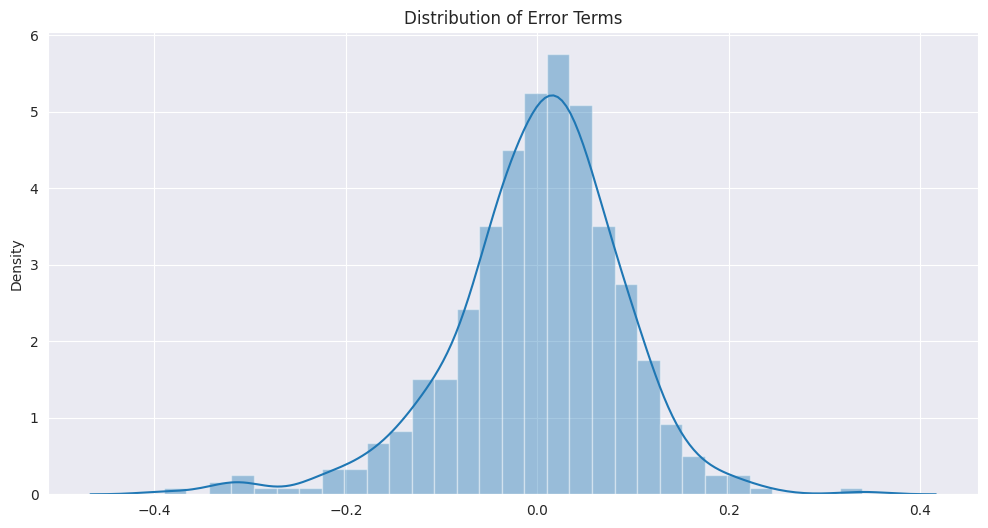

In [ ]:
# Ploting of Residuals
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.distplot(res)
plt.title('Distribution of Error Terms')
plt.show()

 จากด้านบนเราสามารถเห็น Error Terms ถูกแจกแจงตามปกติโดยมีค่าเฉลี่ยเป็นศูนย์ ดังนั้น Model จึงเป็นไปตามสมมติฐานของ Normality

### Linear Regression

**Looking for patterns in the residuals**

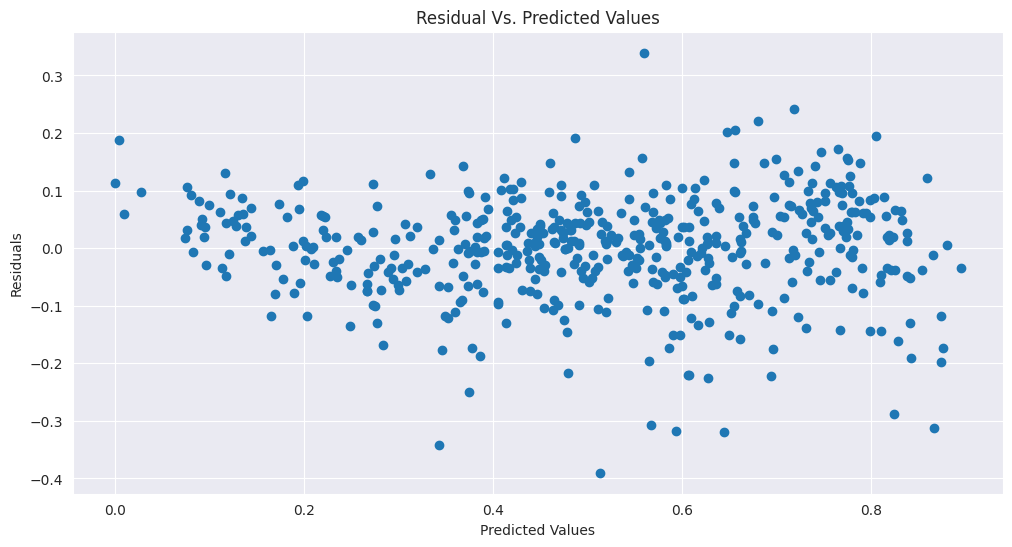

In [ ]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
plt.scatter(y_train_pred,res)
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


เราจะเห็นว่าไม่มีรูปแบบเฉพาะที่สังเกตได้ในการกำหนดข้อผิดพลาดเกี่ยวกับการทำนาย ดังนั้นเราจึงสามารถบอกได้ว่า
เงื่อนไขข้อผิดพลาดเป็นอิสระจากกัน

**Looking for Constant Variance**

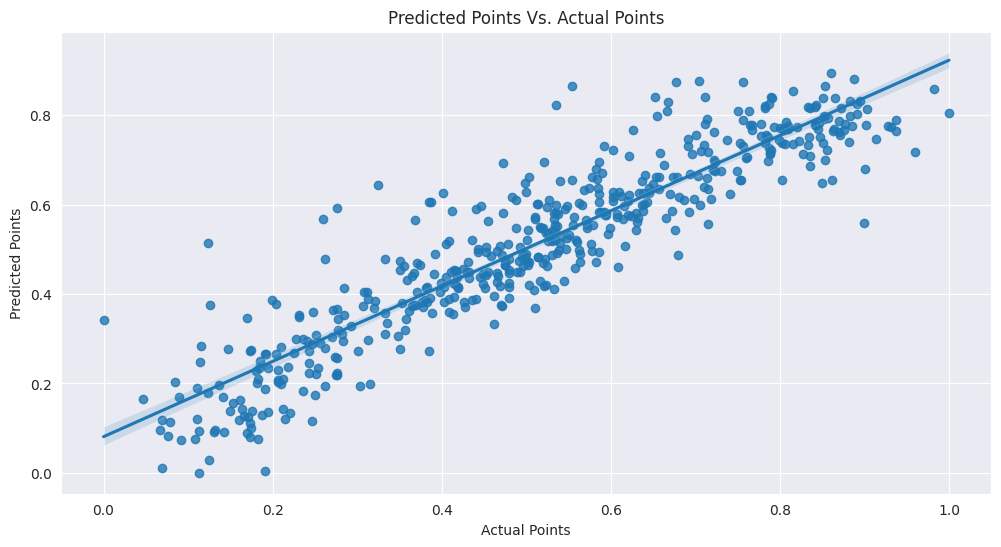

In [ ]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()

 
จะเห็นว่า Error Terms มีความแปรปรวนคงที่โดยประมาณ ดังนั้นจึงเป็นไปตามข้อสันนิษฐานของ Homoscedasticity 

**Model Evaluation on Test Dataset**

Applying the MinMax scaling on the test sets

In [ ]:
num_vars = ['temp', 'windspeed',"hum",'cnt']

df_test[num_vars]=scaler.transform(df_test[num_vars])

y_test = df_test.pop('cnt')
X_test = df_test
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,summer,fall,winter,...,Dec,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday,Clear,Mist,Light
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,1,0,...,0,1,0,0,0,0,0,0,1,0
535,1.0,1,0,1,0.901354,0.610133,0.153728,1,0,0,...,0,0,0,1,0,0,0,1,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,0,1,...,0,0,0,0,1,0,0,0,1,0
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,1,0,...,0,0,0,1,0,0,0,1,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
X_test_smdp = X_test_sm.drop(['fall', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Nov', 'Dec','Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday','Clear'], axis=1)

X_test_smdp


,const,yr,holiday,workingday,temp,hum,windspeed,summer,winter,Aug,Sep,Oct,Saturday,Mist,Light
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,0,0,1,0
535,1.0,1,0,1,0.901354,0.610133,0.153728,1,0,0,0,0,0,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,1,0,0,1,0,1,0
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,1,0,0,0,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,1,0,1,0.519232,0.756118,0.283397,0,1,0,0,0,0,0,0
127,1.0,0,0,0,0.584649,0.650923,0.069510,1,0,0,0,0,0,0,0
640,1.0,1,0,1,0.745598,0.817947,0.052115,0,1,0,0,1,0,1,0
72,1.0,0,0,1,0.331557,0.512107,0.203418,0,0,0,0,0,0,0,0


In [ ]:
#X_test_sm = X_test_smdp.values.reshape(1,-1)
linreg=LinearRegression()
linreg = linreg.fit(X_test_smdp, y_test)
print("linreg.coef_: \n {}".format(linreg.coef_))
print("linreg.intercept_: {}".format(linreg.intercept_))

linreg.coef_: 
 [ 0.          0.22597859 -0.05023707  0.01802159  0.55235609 -0.25661392
 -0.09252903  0.09856073  0.12324357  0.03551213  0.11992053  0.10797033
  0.0439997  -0.03178986 -0.13382506]
linreg.intercept_: 0.21830881410754527


In [ ]:
y_predict = linreg.predict(X_test_smdp)

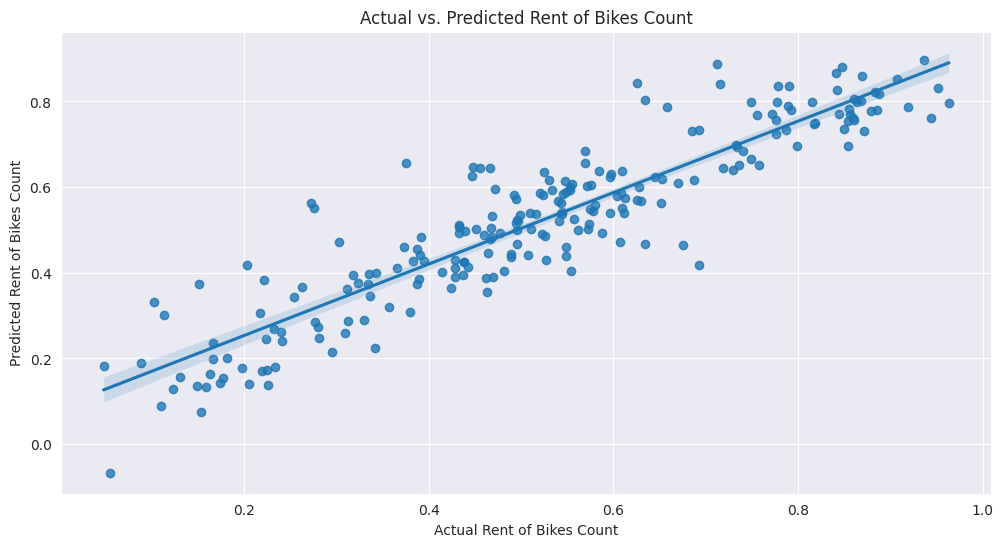

In [ ]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_test, y=y_predict)
plt.title('Actual vs. Predicted Rent of Bikes Count')
plt.xlabel('Actual Rent of Bikes Count')
plt.ylabel('Predicted Rent of Bikes Count')
plt.show()

* จากด้านบน Scatter Plot แสดงถึงความสัมพันธ์เชิงเส้นระหว่างจำนวนคนที่เช่าจักรยานจริงกับจำนวนคนเช่าจักรยานที่เราทำนายได้*

In [ ]:
# Checking the Accuracy of the Test Model
r2_score(y_test,y_predict)

0.834432057048926

- ความแม่นยำของ Final Model อยู่ที่ประมาณ 83.4% ซึ่งเป็นคะแนนที่ดี

- โมเดลมีความแตกต่างเรื่องความแม่นยำของระหว่าง Train และ Test Data น้อยกว่า 3% ซึ่งยอมรับได้ 

### RMSE
คือ Metric สำหรับวัดประสิทธิภาพของโมเดล

ตัวอย่างเช่น Linear Regression ที่มี RMSE เท่ากับ 2.56 แปลว่าโดยเฉลี่ยโมเดลทำนาย y ผิดไป +/- 2.56 point

RMSE ยิ่งมีค่าต่ำยิ่งดี ถ้าเท่ากับ 0 แปลว่าโมเดลทำนายค่า y ได้ถูกต้องเป๊ะ 100% ในทางปฏิบัติโอกาสที่จะเทรนโมเดลได้ loss = 0 เป็นไปได้ยากมาก

In [ ]:
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
print('MSE:', '{:.2f}'.format(mse))
print('RMSE:', '{:.2f}'.format(rmse))


NameError: ignored

- ค่าความคลาดเคลื่อนมาตรฐาน(RootMean
SquaredError:RMSE) มีค่าเท่ากับ 0.09 ซึ่งถือว่ามีความคลาดเคลื่อนที่ค่อนข้างต่ำ

### Ridge Regression Model
เป็นหนึ่งใน model ของการทำ regularization เพื่อป้องกัน overfitting เพื่อหาจุดสมดุลของ model ที่มี low bias และ low variance ซึ่งจะมีการใส่ Penalty term ไม่ให้ model fit มากเกินไป

In [ ]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

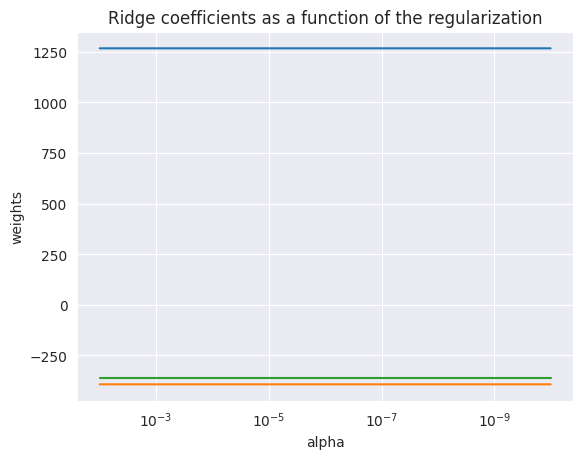

In [ ]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

### Lasso Regression Model
จะเป็นการทำ Regularization ที่แตกต่างจาก Ridge regression เพราะว่า penalty term นั้นไม่ได้นำค่า coefficient มายกกำลัง ข้อดีของ Lasso คือ จะมีการกดตัวแปรที่ไม่สำคัญ และเหลือเฉพาะตัวแปรที่เด่นๆ เท่านั้น

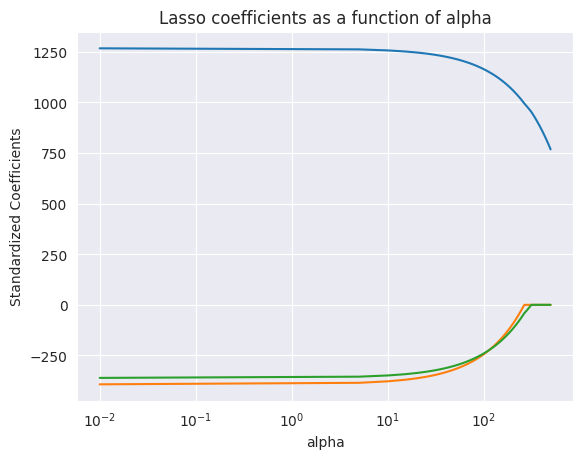

In [ ]:
alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');


##สรุปและอภิปราย


**Insights:**

- อุณหภูมิคือ Feature ที่ส่งผลต่อธุรกิจในเชิงบวกมากที่สุด

- ในขณะที่สภาพแวดล้อมอื่น ๆ เช่น Raining, Humidity, Windspeed and Cloudy ส่งผลกระทบต่อธุรกิจในทางลบ

- บริษัทต้องคิดวิธีจัดการกับสภาพอากาศที่เลวร้ายและคิดหาวิธีแก้ปัญหาที่ปกป้องผู้ใช้จักรยานจากฝนตก

- ความต้องการใช้จักรยานมีมากขึ้นในฤดูหนาวและฤดูร้อน ผู้ใช้ส่วนใหญ่ไม่นิยมเดินทางโดยใช้จักรยานในวันที่ฝนตกหรือฤดูฝน

- สิ่งที่น่าสนใจที่เห็นได้ชัดคือ ในวันเสาร์จะมีคนมาเช่าจักรยานมากกว่าวันอื่น ๆ

- ความต้องการเช่าจักรยานเพิ่มขึ้นอย่างมากในปี 2019 ซึ่งมากกว่าปี 2018 ดังนั้นจึงเป็นสัญญาณที่ชัดเจนว่า ธุรกิจ Boom Bikes กำลังเติบโตนั่นเอง

- แม้ว่าจะไม่เสียเงินสักบาท BOOM Bikes ก็สามารถคาดหวังว่าธุรกิจของพวกเขาจะเติบโตได้ถึง 19%